In [1]:
from sklearn.externals import joblib
import gc
import pandas as pd
import numpy as np
import matplotlib as plt
from PIL import Image
%matplotlib inline  
gc.collect()
from keras.preprocessing.image import load_img#,save_img

Using TensorFlow backend.


oof_train  = joblib.load('./oof test/out_of_fold_test_predictions 828.pkl')
oof_train2 = joblib.load('./oof test/out_of_fold_test_predictions 827.pkl')
oof_train3 = joblib.load('./oof test/out_of_fold_test_predictions 825.pkl')
oof_train4 = joblib.load('./oof test/out_of_fold_test_predictions 828 + 15epoch resnet.pkl')
oof_train_top1  = joblib.load('./oof test/out_of_fold_test_predictions fixed pool +15.pkl')
oof_train_top2  = joblib.load('./oof test/out_of_fold_test_predictions 835 fixed pool.pkl')
oof_train5 = joblib.load('./oof test/out_of_fold_test_predictions resnet34 lb824.pkl') 
oof_train6 = joblib.load('./oof test/out_of_fold_test_predictions 825 isnt deconv.pkl')
oof_train_top0 = joblib.load('./oof test/out_of_fold_test_predictions lb837 152 fixed v2 pool.pkl')

oof_train['images'] = 0.30*(oof_train_top1['images']*0.4+oof_train_top2['images']*0.6) + 0.20*(oof_train['images']*0.25 + 0.20*oof_train2['images']+ 0.15*oof_train3['images']+ 0.25*oof_train4['images']+oof_train5['images']*0.15)+ 0.70*oof_train_top0['images']

oof_train['images'] = 0.3*(oof_train_top1['images']*0.4+oof_train_top2['images']*0.6) + 0.2*(oof_train['images']*0.25 + 0.20*oof_train2['images']+ 0.15*oof_train3['images']+ 0.20*oof_train4['images']+oof_train5['images']*0.10 + oof_train6['images']*0.10)+ 0.60*oof_train_top0['images']

In [2]:
0.55+0.05+0.18+0.17+0.05

1.0

In [3]:
oof_train_top0  = joblib.load('offpredicts.pkl')
oof_train_top1  = joblib.load('./oof test/oof_test_predictions srce hyper.pkl')
oof_train_stride1 = joblib.load('./oof test/oof_test_predictions scse stride1.pkl')
oof_train_stride1v2 = joblib.load('./oof test/oof_test_predictions scse stride1 v2.pkl')
oof_train_stride1v3 = joblib.load('./oof test/oof_test_predictions 0.8359.pkl')
oof_train_top0['images'] = oof_train_top0['images']*0.55 + 0.05*oof_train_top1['images'] + 0.18*oof_train_stride1['images'] + 0.17*oof_train_stride1v2['images'] + 0.05*oof_train_stride1v3['images']
del oof_train_top1, oof_train_stride1, oof_train_stride1v2, oof_train_stride1v3
gc.collect()

16

In [4]:
train_df = pd.read_csv("/home/dex/Desktop/ml/salt/input/train.csv", index_col="id", usecols=[0])
depths_df = pd.read_csv("/home/dex/Desktop/ml/salt/input/depths.csv", index_col="id")
train_df = train_df.join(depths_df)
test_df_lb866 = depths_df[~depths_df.index.isin(train_df.index)]

In [5]:
test_df_lb866["images"] = [np.array(load_img("./lb866/{}.png".format(idx), grayscale=True)) / 255   for idx in (test_df_lb866.index)]
test_df_lb866 = test_df_lb866.loc[oof_train_top0['ids']]
#del oof_train
gc.collect()

/home/dex/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:489: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/home/dex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


14

In [6]:
test_df_lb866.head()

,z,images
id,,
547bfceee8,632,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
de54a0fc4e,631,"[[0.11764705882352941, 0.11372549019607843, 0...."
81b84bb9c9,126,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
ecf1ba6ab9,804,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
ce61662084,539,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [7]:
train_df = pd.read_csv("/home/dex/Desktop/ml/salt/input/train.csv", index_col="id", usecols=[0])
depths_df = pd.read_csv("/home/dex/Desktop/ml/salt/input/depths.csv", index_col="id")
train_df = train_df.join(depths_df)
test_df = depths_df[~depths_df.index.isin(train_df.index)]

test_df["images"] = [np.array(load_img("./output_prev_models_p/{}.png".format(idx), grayscale=True)) / 255   for idx in (test_df.index)]

/home/dex/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:489: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/home/dex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
test_df = test_df.loc[oof_train_top0['ids']]
#del oof_train
gc.collect()


14

In [9]:
test_df.head()

,z,images
id,,
547bfceee8,632,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
de54a0fc4e,631,"[[0.0196078431372549, 0.0196078431372549, 0.01..."
81b84bb9c9,126,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
ecf1ba6ab9,804,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
ce61662084,539,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


joblib.dump(oof_train, 'offpredicts.pkl')

In [10]:
preds1 = []
for val in test_df['images'].values:
    preds1.append(val)
preds1 = np.asarray(preds1)

In [11]:
test_df.head()

,z,images
id,,
547bfceee8,632,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
de54a0fc4e,631,"[[0.0196078431372549, 0.0196078431372549, 0.01..."
81b84bb9c9,126,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
ecf1ba6ab9,804,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
ce61662084,539,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [12]:
preds2 = []
for val in oof_train_top0['images']:
    preds2.append(val[1,:,:])
    #break
preds2 = np.asarray(preds2)

In [13]:
preds3_lb866 = []
for val in test_df_lb866['images'].values:
    preds3_lb866.append(val)
preds3_lb866 = np.asarray(preds3_lb866)
test_df_lb866.head()

,z,images
id,,
547bfceee8,632,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
de54a0fc4e,631,"[[0.11764705882352941, 0.11372549019607843, 0...."
81b84bb9c9,126,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
ecf1ba6ab9,804,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
ce61662084,539,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [14]:
preds1 = 0.25*(0.5*preds1 + 0.5*preds2) + 0.75*preds3_lb866

In [15]:
preds2.max(), preds1.max()

(0.99510366, 0.9890928187791039)

In [16]:
predictions = preds1
ids = oof_train_top0['ids']

In [17]:
def binarize_img(img_ens):
    positive = img_ens > threshold_best
    img_ens[positive] = 255
    img_ens[~positive] = 0
    return img_ens.astype('uint8')

In [18]:
def remove_small_blobs(mask, min_size=6):
    # find all your connected components (white blobs in your image)
    mask = binarize_img(mask)
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    # connectedComponentswithStats yields every seperated component with information on each of them, such as size
    # the following part is just taking out the background which is also considered a component, but most of the time we don't want that.
    sizes = stats[1:, -1]
    nb_components = nb_components - 1

    # minimum size of particles we want to keep (number of pixels)
    # here, it's a fixed value, but you can set it as you want, eg the mean of the sizes or whatever


    # your answer image
    img2 = np.zeros((output.shape), dtype='uint8')
    # for every component in the image, you keep it only if it's above min_size
    for i in range(0, nb_components):
        if sizes[i] >= min_size:
            img2[output == i + 1] = 255
    return img2
import numpy as np
def rle_encode(im):
    '''
    im: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = im.flatten(order = 'F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
def filter_image(img):
    if img.sum() < 6:
        return np.zeros(img.shape)
    else:
        return img

In [21]:
from tqdm import tqdm
import cv2
threshold_best = 0.43
pred_dict = {idx: rle_encode(remove_small_blobs(pred)) for idx, pred in (zip(ids, predictions))}
sub = pd.DataFrame.from_dict(pred_dict,orient='index')
sub.index.names = ['id']
sub.columns = ['rle_mask']
sub.to_csv('remove_small_blobs(6) 0.25*(0.5*kmike_v1 + 0.5*insaf) + 0.75*lb866 thresh 43(bombanulo).csv')

In [20]:
from tqdm import tqdm
threshold_best = 0.41
pred_dict = {idx: rle_encode(filter_image(pred > threshold_best)) for idx, pred in (zip(ids, predictions))}
sub = pd.DataFrame.from_dict(pred_dict,orient='index')
sub.index.names = ['id']
sub.columns = ['rle_mask']
sub.to_csv('0.2*(0.7*kmike_v1 + 0.3*insaf) + 0.8*lb866 thresh 41 filtered 6 (tryhard).csv')

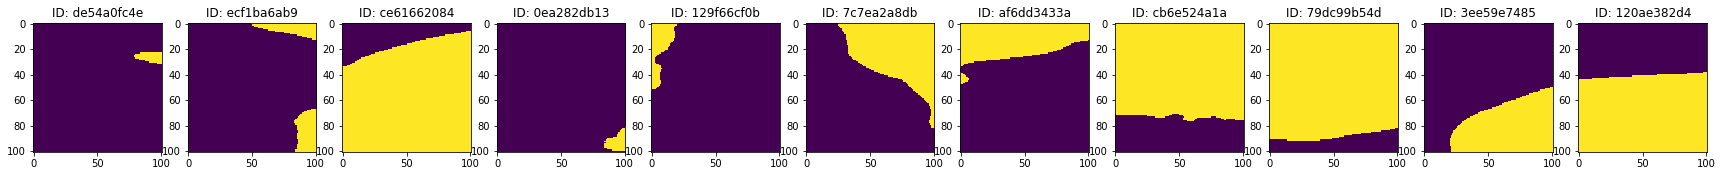

In [110]:
df = pd.read_csv('0.3*(0.5*kmike_v1 + 0.5*insaf) + 0.7*lb866 thresh 40 filtered 10 (tryhard).csv')
i = 0
j = 0
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.2)  #adjust this to change vertical and horiz. spacings..
# Visualizing the predicted outputs
while True:
    if str(df.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(df.loc[i,'rle_mask'])
        plt.subplot(1,11,j+1)
        plt.imshow(decoded_mask)
        plt.title('ID: '+df.loc[i,'id'])
        j = j + 1
        if j>10:
            break
    i = i + 1

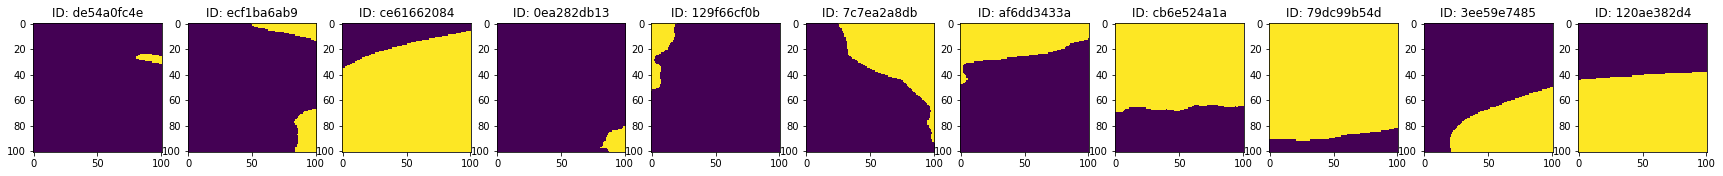

In [59]:
df = pd.read_csv('0.2*(0.7*kmike_v1 + 0.3*insaf_V4) + 0.8*lb866 thresh 40 filtered 6.csv')
i = 0
j = 0
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.2)  #adjust this to change vertical and horiz. spacings..
# Visualizing the predicted outputs
while True:
    if str(df.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(df.loc[i,'rle_mask'])
        plt.subplot(1,11,j+1)
        plt.imshow(decoded_mask)
        plt.title('ID: '+df.loc[i,'id'])
        j = j + 1
        if j>10:
            break
    i = i + 1

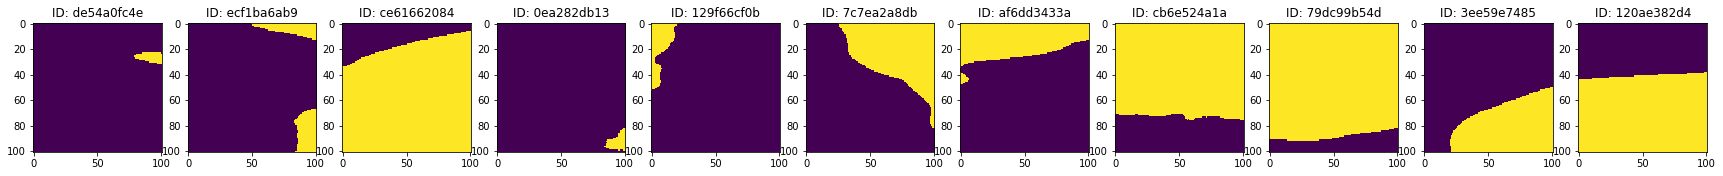

In [22]:
import numpy as np
import pydensecrf.densecrf as dcrf
from skimage.io import imread, imsave
from pydensecrf.utils import unary_from_labels, create_pairwise_bilateral
from skimage.color import gray2rgb
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from pycocotools import mask as cocomask
def binary_from_rle(rle):
    return cocomask.decode(rle)
%matplotlib inline

def rle_decode(rle_mask):
    '''
    rle_mask: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    if rle_mask !=str(np.nan):
        s = rle_mask.split()
        starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
        starts -= 1
        ends = starts + lengths
        img = np.zeros(101*101, dtype=np.uint8)
        for lo, hi in zip(starts, ends):
            img[lo:hi] = 1
        return img.reshape(101,101)
df = pd.read_csv('remove_small_blobs(6) 0.25*(0.5*kmike_v1 + 0.5*insaf) + 0.75*lb866 thresh 43(bombanulo).csv')
i = 0
j = 0
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.2)  #adjust this to change vertical and horiz. spacings..
# Visualizing the predicted outputs
while True:
    if str(df.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(df.loc[i,'rle_mask'])
        plt.subplot(1,11,j+1)
        plt.imshow(decoded_mask)
        plt.title('ID: '+df.loc[i,'id'])
        j = j + 1
        if j>10:
            break
    i = i + 1

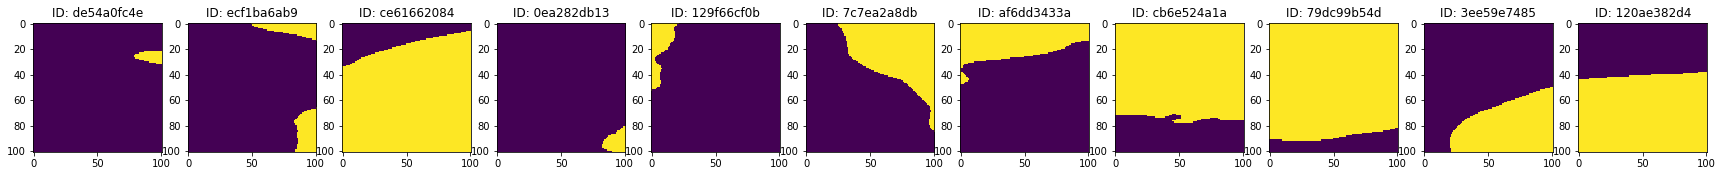

In [20]:
df = pd.read_csv('remove_small_blobs(9) 0.5*(0.5*kmike_v1 + 0.5*insaf) + 0.5*lb866 thresh 35(tryhard).csv')
i = 0
j = 0
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.2)  #adjust this to change vertical and horiz. spacings..
# Visualizing the predicted outputs
while True:
    if str(df.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(df.loc[i,'rle_mask'])
        plt.subplot(1,11,j+1)
        plt.imshow(decoded_mask)
        plt.title('ID: '+df.loc[i,'id'])
        j = j + 1
        if j>10:
            break
    i = i + 1

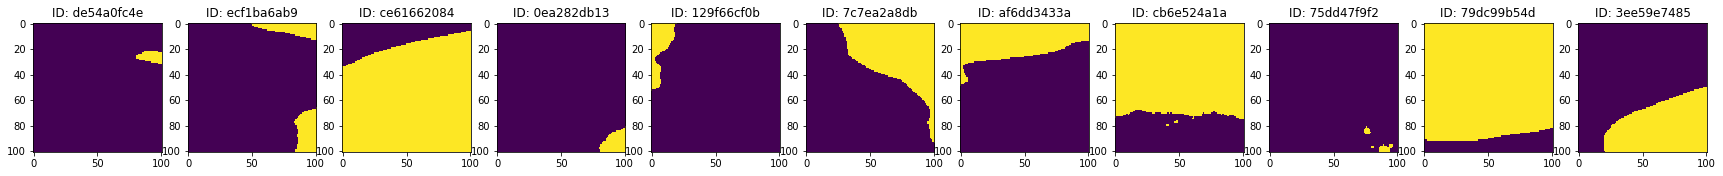

In [34]:
df = pd.read_csv('0.5*kmike + 0.5*insaf  thresh 35 filtered 10.csv')
i = 0
j = 0
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.2)  #adjust this to change vertical and horiz. spacings..
# Visualizing the predicted outputs
while True:
    if str(df.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(df.loc[i,'rle_mask'])
        plt.subplot(1,11,j+1)
        plt.imshow(decoded_mask)
        plt.title('ID: '+df.loc[i,'id'])
        j = j + 1
        if j>10:
            break
    i = i + 1

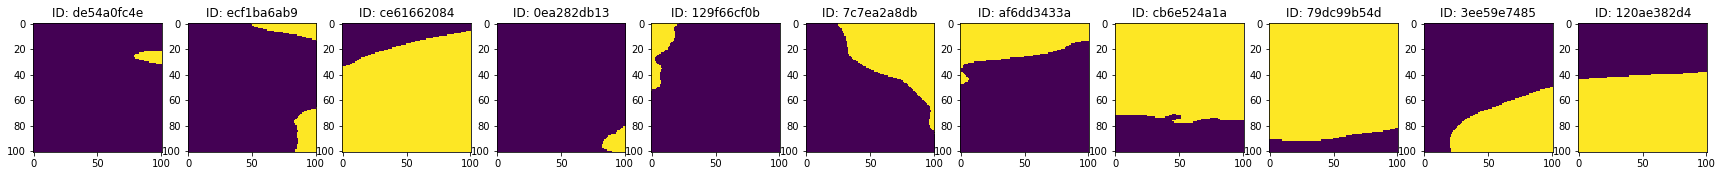

In [23]:
df = pd.read_csv('0.2*(0.7*kmike_v1 + 0.3*insaf) + 0.8*lb866 thresh 41 filtered 6 (tryhard).csv')
i = 0
j = 0
plt.figure(figsize=(30,15))
plt.subplots_adjust(bottom=0.2, top=0.8, hspace=0.2)  #adjust this to change vertical and horiz. spacings..
# Visualizing the predicted outputs
while True:
    if str(df.loc[i,'rle_mask'])!=str(np.nan):        
        decoded_mask = rle_decode(df.loc[i,'rle_mask'])
        plt.subplot(1,11,j+1)
        plt.imshow(decoded_mask)
        plt.title('ID: '+df.loc[i,'id'])
        j = j + 1
        if j>10:
            break
    i = i + 1